In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.model_selection import LeaveOneOut
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
import scipy

###reading data
missing_value=['?']
data = pd.read_csv("data/eye-tracking and others.csv",na_values=missing_value, delimiter=",")

# print(data.isnull().sum())
print(data.shape)
##removing missing values
data.dropna(inplace=True)
#16 row removed.
print(data.shape)
# data
# CDT culomn is eliminated because this culomn is empty.

(120, 62)
(104, 62)


In [120]:
data1, data3 = data.copy(), data.copy()
data1["group"] = np.array([1 if yins ==2 else 0 if yins == 1 else np.nan for yins in data1.values[:,0]])
data3["group"] = np.array([1 if yins ==3 else 0 if yins == 1 else np.nan for yins in data3.values[:,0]])
data1.dropna(inplace=True)
data3.dropna(inplace=True)


# X=data1.iloc[:,1:]
# y=data1.iloc[:,0]

# X = X.astype(np.float64)
# y = y.astype(np.float64)

X=data3.iloc[:,1:]
y=data3.iloc[:,0]
X.shape

(68, 61)

c:\program files\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.         0.00365199 0.         0.01300187 0.         0.02302195
 0.00547798 0.         0.02356913 0.         0.04924601 0.
 0.         0.02065948 0.         0.00089895 0.14995425 0.02796189
 0.         0.01174651 0.         0.02490489 0.         0.
 0.02130661 0.06813049 0.05480547 0.         0.0125211  0.
 0.01509488 0.         0.         0.         0.01970334 0.07132598
 0.         0.         0.         0.00766917 0.         0.
 0.         0.03287505 0.02496149 0.10414445 0.01190283 0.
 0.         0.         0.00547798 0.         0.00685762 0.
 0.         0.00078257 0.00553331 0.03525635 0.01192982 0.01857831
 0.11704827]


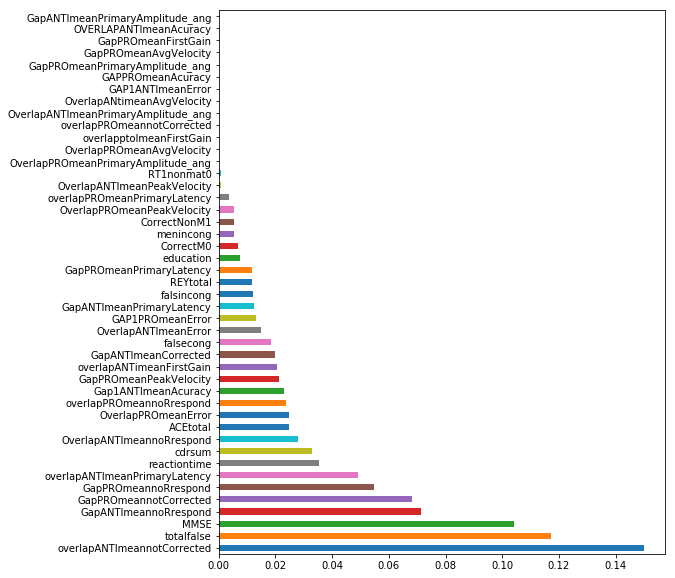

In [121]:
# import pandas as pd
# import numpy as np
# data = pd.read_csv("D://Blogs//train.csv")
# X = data.iloc[:,0:20]  #independent columns
# y = data.iloc[:,-1]    #target column i.e price range
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(45).plot(kind='barh')
plt.show()


In [122]:
# print(scipy.stats.entropy(X['OverlapPROmeanAcuracy']))
# X.columns
# for f in X.columns:
#     print(f, scipy.stats.entropy(X[f]))
    

c:\program files\python36\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Best alpha using built-in LassoCV: 1.261116
Best score using built-in LassoCV: 0.810971
Lasso picked 15 variables and eliminated the other 46 variables


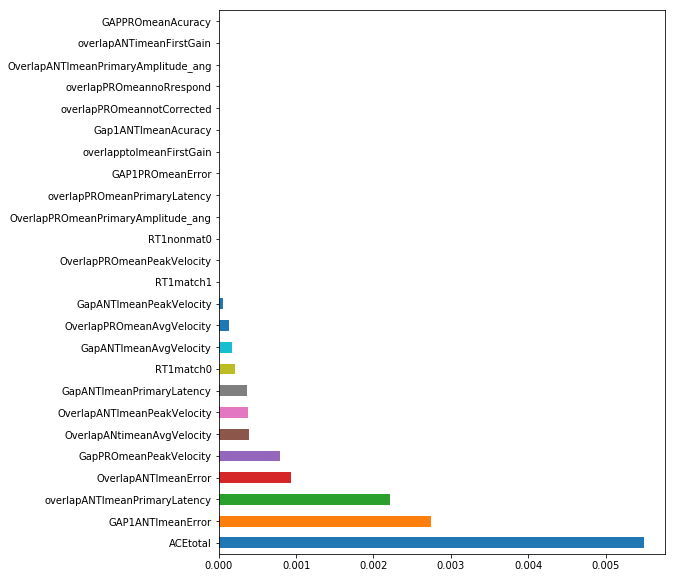

OverlapPROmeanPrimaryAmplitude_ang     0.000000e+00
overlapPROmeanPrimaryLatency          -0.000000e+00
OverlapPROmeanAvgVelocity             -1.266618e-04
GAP1PROmeanError                       0.000000e+00
overlapptoImeanFirstGain              -0.000000e+00
Gap1ANTImeanAcuracy                   -0.000000e+00
OverlapPROmeanPeakVelocity            -8.853579e-07
overlapPROmeannotCorrected             0.000000e+00
overlapPROmeannoRrespond               0.000000e+00
OverlapANTImeanPrimaryAmplitude_ang    0.000000e+00
overlapANTImeanPrimaryLatency          2.208141e-03
OverlapANtimeanAvgVelocity            -3.852711e-04
GAP1ANTImeanError                      2.747110e-03
overlapANTimeanFirstGain              -0.000000e+00
GAPPROmeanAcuracy                     -0.000000e+00
OverlapANTImeanPeakVelocity            3.817879e-04
overlapANTImeannotCorrected            0.000000e+00
OverlapANTImeannoRrespond              0.000000e+00
GapPROmeanPrimaryAmplitude_ang        -0.000000e+00
GapPROmeanPr

In [123]:
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")
coef1 = np.abs(coef)
feat_importances = pd.Series(coef1, index=X.columns)
feat_importances.nlargest(25).plot(kind='barh')
plt.show()
coef

Text(0.5, 1.0, 'Feature importance using Lasso Model')

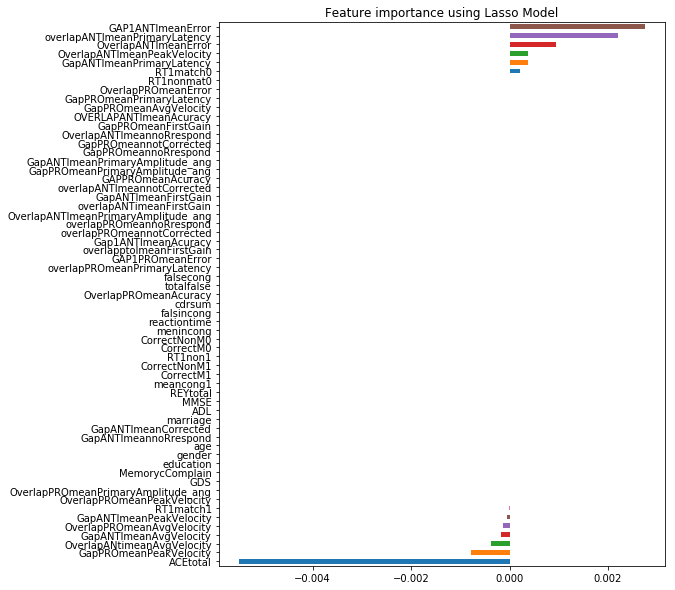

In [124]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

 Removing features with low variance


In [125]:
# from sklearn.feature_selection import VarianceThreshold
# # X = [[0, 0, 1], [0, 1, 0], [1, 0, 0], [0, 1, 1], [0, 1, 0], [0, 1, 1]]
# sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
# z = sel.fit_transform(X)
# z = pd.DataFrame(z)
# z

Univariate feature selection

In [126]:

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
print(X.shape)

X_new = SelectKBest(chi2).fit_transform(X, y)
print(X_new.shape)
selectedfeature = ['OverlapPROmeanAvgVelocity','GAP1PROmeanError','OverlapPROmeanPeakVelocity',
                             'OverlapANTImeanPeakVelocity','OverlapPROmeanError','GapPROmeanPeakVelocity',
                             'GapANTImeanAvgVelocity','OverlapANTImeanError','GapANTImeanPeakVelocity','totalfalse']
print(selectedfeature)
pd.DataFrame(X_new, columns=selectedfeature)


(68, 61)
(68, 10)
['OverlapPROmeanAvgVelocity', 'GAP1PROmeanError', 'OverlapPROmeanPeakVelocity', 'OverlapANTImeanPeakVelocity', 'OverlapPROmeanError', 'GapPROmeanPeakVelocity', 'GapANTImeanAvgVelocity', 'OverlapANTImeanError', 'GapANTImeanPeakVelocity', 'totalfalse']


,OverlapPROmeanAvgVelocity,GAP1PROmeanError,OverlapPROmeanPeakVelocity,OverlapANTImeanPeakVelocity,OverlapPROmeanError,GapPROmeanPeakVelocity,GapANTImeanAvgVelocity,OverlapANTImeanError,GapANTImeanPeakVelocity,totalfalse
0,535.00,535.00,405.93,535.00,2.02,21.76,160.20,160.04,549.0,7.0
1,0.05,0.10,304.23,0.03,0.00,0.02,153.01,68.03,310.0,4.0
2,388.05,0.10,302.10,0.03,8.70,134.01,160.02,160.08,668.0,6.0
3,0.08,0.15,337.68,0.15,0.00,35.01,160.01,0.01,690.0,4.0
4,0.03,0.05,374.53,0.09,12.50,134.01,160.01,160.01,1042.0,4.0
5,0.03,0.06,383.96,0.26,4.17,0.03,0.01,68.03,490.0,2.0
6,424.00,145.00,409.92,435.00,4.17,0.04,158.02,11.04,539.0,4.0
7,669.02,0.02,416.55,0.01,4.17,134.01,158.01,23.01,1127.0,6.0
8,570.82,51070.84,337.14,526.22,12.50,0.10,0.04,34.11,934.0,13.0
9,669.71,669.73,306.59,415.11,4.17,135.01,158.01,160.01,628.0,4.0


L1-based feature selection

In [127]:
# from sklearn.svm import LinearSVC
# from sklearn.feature_selection import SelectFromModel


# X.shape

# lsvc = LinearSVC(C=0.1, penalty="l1", dual=False).fit(X, y)
# model = SelectFromModel(lsvc, prefit=True)
# X_new = model.transform(X)
# X_new.shape


Tree-based feature selection

In [128]:
# from sklearn.ensemble import ExtraTreesClassifier
# from sklearn.feature_selection import SelectFromModel

# print(X.shape)

# clf = ExtraTreesClassifier(n_estimators=50)
# clf = clf.fit(X, y)
# print(clf.feature_importances_)  

# model = SelectFromModel(clf, prefit=True)
# X_new = model.transform(X)
# X_new.shape               


In [129]:
# y = list(y)

In [130]:
y.values[[1,2]]

array([0., 0.])

In [131]:

###### Devide data to test and train
X_train,X_test,y_train,y_test=train_test_split(X.values[:,:],y[:],test_size=0.2,random_state=25)

#preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_transformed = scaler.transform(X_train)
X_test_transformed = scaler.transform(X_test)
# X_transformed = scaler.transform(X)


In [132]:
methodList = []
accList = []
sensitivityList = []
specificityList = []

In [133]:
loo = LeaveOneOut()
loo.get_n_splits(X_transformed)
loologreg = LogisticRegression()
predicts=[]

for train_index, test_index in loo.split(X_transformed):
    X_train, X_test = X_transformed[train_index], X_transformed[test_index]
    y_train, y_test = y.values[train_index], y.values[test_index]
    loologregModel =loologreg.fit(X_train, np.array(list(y_train)))
    predicts.append(loologreg.predict(X_test))

predict = np.array(predicts)
cnf_matrix = metrics.confusion_matrix(y, predict)

print(cnf_matrix)

acc = metrics.accuracy_score(y, predict)
print("Logistic Regression Accuracy by LOOCV", acc)

# recall = metrics.recall_score(y, predict)
# print("Logistic Regression Recall by LOOCV", recall)
#
# precession = metrics.precision_score(y, predict)
# print("Logistic Regression Precession by LOOCV", precession)

######ploting
# import required modules


#matplotlib inline
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Logestic Regression Confusion matrix', y=1.1)

plt.ylabel('Actual label')
plt.xlabel('Predicted label')

plt.show()


#### Roc Curve
fpr, tpr, _ = metrics.roc_curve(y,  predict)
auc = metrics.roc_auc_score(y, predict)
print("Logestic Regression sensitivity = "+str(tpr)+"and Logestic Regression specificity = "+str(fpr))
plt.plot(fpr,tpr,label="Logistic Regression, AUC = "+str(auc))
plt.title("Logistic Regression ROC Curve")
plt.legend(loc=4)
plt.show()

methodList.append('Logistic Regression')
accList.append(acc)
sensitivityList.append(tpr[1])
specificityList.append(1-fpr[1])

IndexError: index 68 is out of bounds for axis 0 with size 68

[[48  1]
 [ 0 19]]
Gaussian Naive Bayes Accuracy by LOOCV 0.9852941176470589


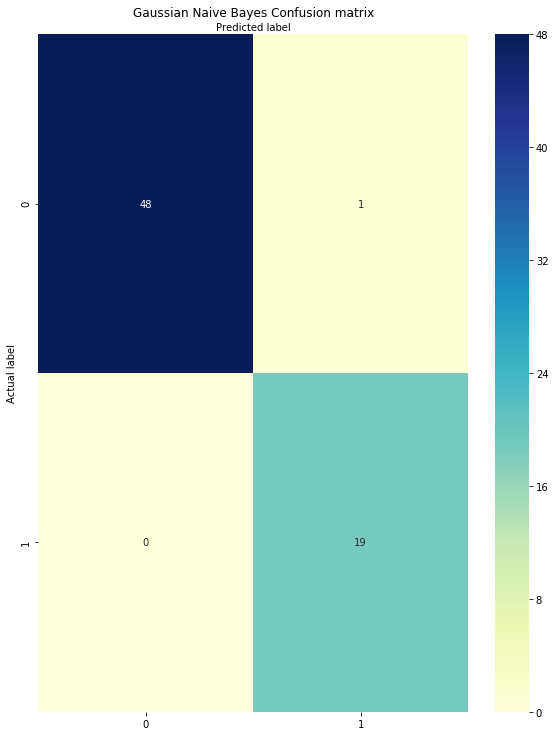

Gaussian Naive Bayes sensitivity = [0. 1. 1.]and Gaussian Naive Bayes specificity = [0.         0.02040816 1.        ]


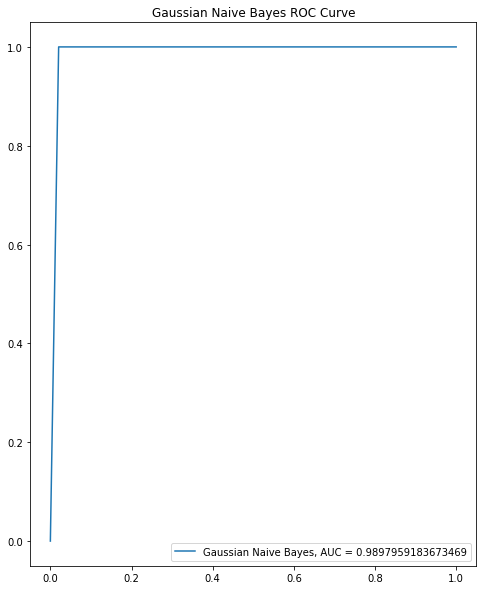

In [134]:

####GaussianNB

loo = LeaveOneOut()
loo.get_n_splits(X)
loologreg = GaussianNB()
predicts=[]
for train_index, test_index in loo.split(X):
    X_train, X_test = X_transformed[train_index], X_transformed[test_index]
    y_train, y_test = y.values[train_index], y.values[test_index]
    loologregModel =loologreg.fit(X_train, y_train)
    predicts.append(loologreg.predict(X_test))

predict = np.array(predicts)
cnf_matrix = metrics.confusion_matrix(y, predict)

print(cnf_matrix)

acc = metrics.accuracy_score(y, predict)
print("Gaussian Naive Bayes Accuracy by LOOCV", acc)
######ploting



#matplotlib inline
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Gaussian Naive Bayes Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

plt.show()

#### Roc Curve
fpr, tpr, _ = metrics.roc_curve(y,  predict)
auc = metrics.roc_auc_score(y, predict)
print("Gaussian Naive Bayes sensitivity = "+str(tpr)+"and Gaussian Naive Bayes specificity = "+str(fpr))
plt.plot(fpr,tpr,label="Gaussian Naive Bayes, AUC = "+str(auc))
plt.title("Gaussian Naive Bayes ROC Curve")
plt.legend(loc=4)
plt.show()

methodList.append('Gaussian Naive Bayes')
accList.append(acc)
sensitivityList.append(tpr[1])
specificityList.append(1-fpr[1])

In [135]:

###SVM
loo = LeaveOneOut()
loo.get_n_splits(X)
loologreg = svmachine = svm.SVC(gamma='auto',kernel='rbf',degree=3)

predicts=[]
for train_index, test_index in loo.split(X_transformed):
    X_train, X_test = X_transformed[train_index], X_transformed[test_index]
    y_train, y_test = y.values[train_index], y.values[test_index]
    loologregModel =loologreg.fit(X_train, y_train)
    predicts.append(loologregModel.predict(X_test))

predict = np.array(predicts)
cnf_matrix = metrics.confusion_matrix(y, predict)

print(cnf_matrix)

acc = metrics.accuracy_score(y, predict)
print("Support Vector Machine Accuracy by LOOCV", acc)

# recall = metrics.recall_score(y, predict)
# print("Logistic Regression Recall by LOOCV", recall)
#
# precession = metrics.precision_score(y, predict)
# print("Logistic Regression Precession by LOOCV", precession)

######ploting



#matplotlib inline
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Support Vector Machine Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

plt.show()

#### Roc Curve

fpr, tpr, _ = metrics.roc_curve(y,  predict)
auc = metrics.roc_auc_score(y, predict)
print("SVM sensitivity = "+str(tpr)+"and SVM specificity = "+str(fpr))
plt.plot(fpr,tpr,label="SVM, AUC = "+str(auc))
plt.title("Support Vector Machine ROC Curve")
plt.legend(loc=4)
plt.show()

methodList.append('Support Vector Machine')
accList.append(acc)
sensitivityList.append(tpr[1])
specificityList.append(1-fpr[1])

IndexError: index 68 is out of bounds for axis 0 with size 68

In [118]:
result = []
result = pd.DataFrame(result)
result['method'],result['accuracy'],result['sensitivity'],result['specificity']=methodList,accList,sensitivityList,specificityList
result.to_csv('eye-tracking and others(2 vs 1).csv',index=False)